In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisect(f, a, b, tol=1e-9, maxNumberIterations=100):
    # Evaluating the extreme points of the interval provided
    fa = f(a)
    fb = f(b)
    # Iteration counter.
    i = 0
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
    # Main loop: it will iterate until it satisfies one of the two criterias:
    # The tolerance 'tol' is achived or the max number of iterations is reached.
    while ((b-a)/2 > tol) and i<=maxNumberIterations:
        # Obtaining the midpoint of the interval. Quick question: What could happen if a different point is used?
        c = (a+b)/2.
        # Evaluating the mid point
        fc = f(c)
        # Did we find the root?
        if fc == 0:
            print('f(c)==0')
            break
        elif np.sign(fa*fc) < 0:
            # This first case consider that the new inetrval is defined by [a,c]
            b = c
            fb = fc
        else:
            # This second case consider that the new interval is defined by [c,b]
            a = c
            fa = fc
        # Increasing the iteration counter
        i += 1
    # Computing the best approximation obtaind for the root, which is the midpoint of the final interval.
    xc = (a+b)/2.
    return xc

In [3]:
# Forward Euler Method
def eulerMethod_one_step(yi,ti,f,h):
    return yi + h*f(ti,yi)

def eulerMethod(t0,T,N,y0,f):
    t = np.linspace(t0,T,N + 1)
    h = (T - t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N + 1)
    else:
        y = np.zeros((N + 1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = eulerMethod_one_step(y[i],t[i],f,h)
    return t, y

# Runge-Kutta of Second order
def RK2_one_step(yi,ti,f,h):
    k1 = f(ti,yi)
    return yi + h*f(ti + h/2.0,yi + h/2.0*k1)

def RK2(t0,T,N,y0,f):
    t = np.linspace(t0,T,N + 1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N + 1)
    else:
        y = np.zeros((N + 1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = RK2_one_step(y[i],t[i],f,h)
    return t, y

Resolver el siguiente BVP, mediante el método del disparo:

$$
\begin{align}
y'' &= y' + \cos(y) \\
y(0) &= 0 \\
y(\pi) &= 1
\end{align}
$$

Definimos el IVP equivalente:

$$
\mathbf{y}(t) =
\begin{bmatrix}
y(t) \\ y'(t) 
\end{bmatrix}
=
\begin{bmatrix}
y_1(t) \\ y_2(t)
\end{bmatrix}
\qquad
\mathbf{y}' =
\begin{bmatrix}
y'(t) \\ y''(t) 
\end{bmatrix}
=
\begin{bmatrix}
y_2(t) \\ y_2(t) + \cos(y_1(t)) 
\end{bmatrix}
= \mathbf{f}(t,\mathbf{y})
\qquad\qquad
\mathbf{y}(0) = 
\begin{bmatrix}
y(0) \\ y'(0) 
\end{bmatrix}
= 
\begin{bmatrix}
0 \\ s 
\end{bmatrix}
$$

Definimos la función $F(s)$ a la cual buscamos la raíz:

$$
F(s) = \mathbf{y}_{N,1} - y(1) = \mathbf{y}_{N,1} - 1 = 0
$$

In [4]:
def f(t,y):
    return np.array([y[1],y[1] + np.cos(y[0])])

def F(s):
    t0,T = 0.,np.pi
    N = 500
    y0 = np.array([0.,s])
    t,y = eulerMethod(t0,T,N,y0,f)
    return y[N,0] - 1.

In [5]:
#Para la búsqueda de raíz debemos tener dos valores s0 y s1 tal que F(s0)*F(s1) < 0
s0,s1 = -1.,1.
print(f"F({s0}) = {F(s0)}")
print(f"F({s1}) = {F(s1)}")

#Vemos en el gráfico que al resolver con estos valores el IVP quedan por sobre y bajo el valor para y'(1).
t0,T = 0.,np.pi
N = 500
y0 = np.array([0.,s0])
t,y_s0 = eulerMethod(t0,T,N,y0,f)
y0 = np.array([0.,s1])
t,y_s1 = eulerMethod(t0,T,N,y0,f)

F(-1.0) = -11.700772317855815
F(1.0) = 27.97118418873207


In [6]:
#Aplicamos Bisección para encontrar la raíz
s_a = bisect(F, s0, s1)
print(f"F({s_a}) = {F(s_a)}")

F(-0.7364250356331468) = 1.764760937383869e-08


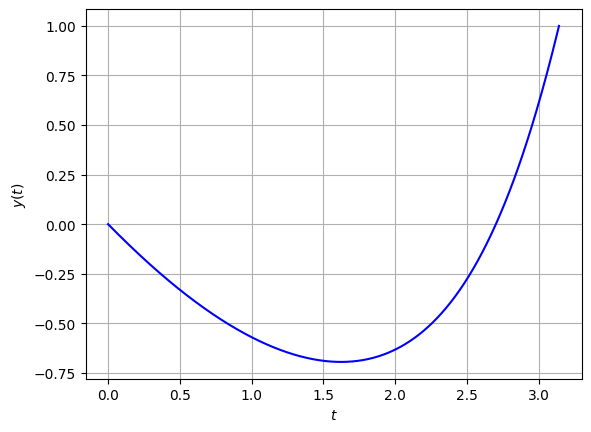

In [7]:
#Aplicamos el método de Euler con y'(0) = s_a
t0,T = 0.,np.pi
N = 500
y0 = np.array([0.,s_a])
t,y = eulerMethod(t0,T,N,y0,f)

plt.plot(t,y[:,0],'-b')
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")
plt.show()

In [14]:
import numpy as np
def my_diag(x,n):
    A = np.zeros((n,n))
    i = np.arange(n)
    A[i,i] = x
    return A
my_diag(np.array([1,2,3,4,5]),5)

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.],
       [0., 0., 0., 0., 5.]])